# import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
import ipywidgets as widg

from IPython.display import display
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# import data

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)

names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data.columns = names

data = data.drop(columns='ID')

data['Class'].replace(
                      {
                          1:'building_windows_float_processed',
                          2:'building_windows_non_float_processed',
                          3:'vehicle_windows_float_processed',
                          4:'vehicle_windows_non_float_processed',
                          5:'containers',
                          6:'tableware',
                          7:'headlamps'
                      }, inplace = True)

In [4]:
for col in data.columns:
  fr = np.random.randint(5, 10) / 100 
  data.loc[data.sample(frac=fr).index, col] = np.nan

# Data Vizualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      203 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      199 non-null    float64
 3   Al      195 non-null    float64
 4   Si      197 non-null    float64
 5   K       201 non-null    float64
 6   Ca      201 non-null    float64
 7   Ba      197 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [6]:
print(data)

          RI     Na    Mg  ...    Ba   Fe                             Class
0        NaN  13.64  4.49  ...  0.00  0.0  building_windows_float_processed
1    1.51761  13.89  3.60  ...  0.00  0.0  building_windows_float_processed
2    1.51618  13.53  3.55  ...  0.00  0.0  building_windows_float_processed
3    1.51766  13.21  3.69  ...  0.00  0.0  building_windows_float_processed
4    1.51742  13.27  3.62  ...  0.00  0.0                               NaN
..       ...    ...   ...  ...   ...  ...                               ...
209  1.51623  14.14  0.00  ...  1.06  0.0                         headlamps
210  1.51685  14.92  0.00  ...  1.59  0.0                         headlamps
211  1.52065  14.36  0.00  ...  1.64  0.0                         headlamps
212  1.51651  14.38  0.00  ...   NaN  0.0                         headlamps
213  1.51711  14.23  0.00  ...  1.67  0.0                         headlamps

[214 rows x 10 columns]


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,203.000000,197.000000,199.000000,195.000000,197.000000,201.000000,201.000000,197.000000,199.000000
mean,1.518416,13.395431,2.701910,1.427128,72.645990,0.504129,8.965771,0.167208,0.056131
std,0.003071,0.822131,1.437271,0.494549,0.774431,0.668682,1.406081,0.484972,0.097352
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516540,12.900000,2.220000,1.180000,72.280000,0.130000,8.270000,0.000000,0.000000
50%,1.517680,13.290000,3.480000,1.350000,72.790000,0.550000,8.610000,0.000000,0.000000
75%,1.519135,13.800000,3.600000,1.615000,73.100000,0.610000,9.150000,0.000000,0.095000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
display(data['Class'].describe())
print('\n==============================================\n')
display(data['Class'].value_counts())

count                                      197
unique                                       6
top       building_windows_non_float_processed
freq                                        72
Name: Class, dtype: object

building_windows_non_float_processed    72
building_windows_float_processed        64
headlamps                               26
vehicle_windows_float_processed         15
containers                              11
tableware                                9
Name: Class, dtype: int64

In [9]:
#for col in data.columns:
#missing_values_counts = data(col).isna().sum()
#data(col).isna().sum()
#percentage = 100 * data(col).isna().sum()/len(data('col'))
#print("Column",col,"contains",missing_values_counts,"NULL values (", 
#percentage)

# Histograms

In [10]:
col = 'Al'
# plt.hist(col)
# plt.show()

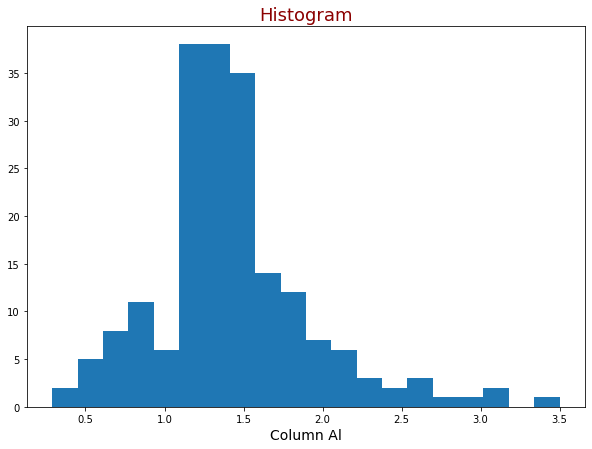

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

ax.hist(data[col], bins=20)
ax.set_xlabel('Column ' + str(col), fontsize = 14)
ax.set_title('Histogram', fontsize = 18, color = 'darkred')

plt.show()

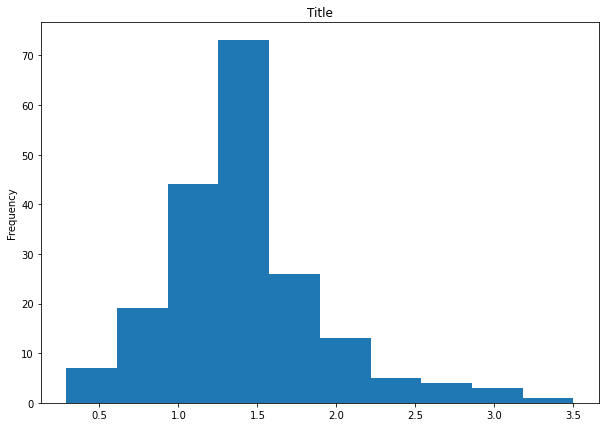

In [12]:
# data.plot(figsize=(15,8))
ax = data[col].plot(kind='hist', figsize=(10,7))
ax.set_title('Title')

plt.show()

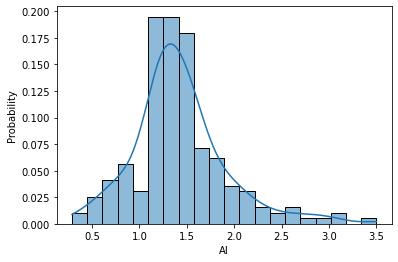

In [13]:
sns.histplot(data=data, x='Al',
             bins=20, 
             kde=True,
             stat='probability')
plt.show()

# Barplot

In [14]:
df1 = data['Class'].value_counts()
df1 

building_windows_non_float_processed    72
building_windows_float_processed        64
headlamps                               26
vehicle_windows_float_processed         15
containers                              11
tableware                                9
Name: Class, dtype: int64

In [15]:
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

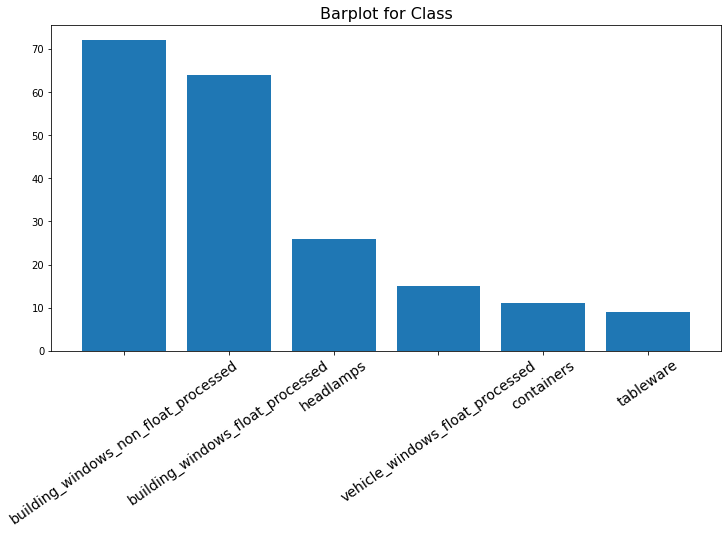

In [16]:
col1 = 'Class'

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(data['Class'].value_counts().index.values,
       data['Class'].value_counts().values)

ax.set_xlabel(None, fontsize = 16 )
ax.set_title('Barplot for '+str(col1), fontsize=16)
ax.tick_params(axis='x', which='major',
               labelsize=14, rotation=35)

plt.show()

# Boxplot

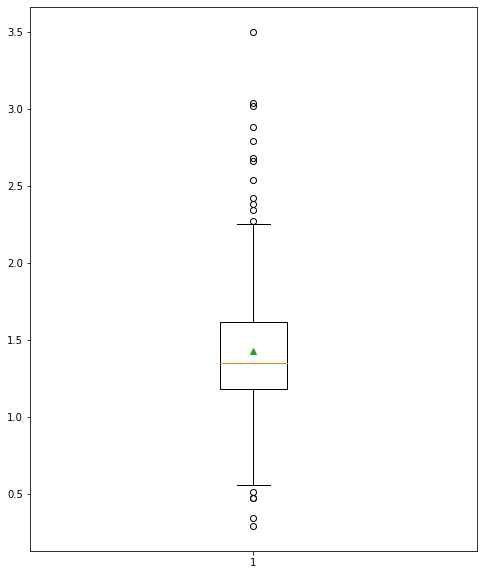

In [17]:
# np.isnan(data['Al'])
# data['Al'][~np.isnan(data['Al'])]

fig3, ax3 = plt.subplots(figsize = (8, 10))

ax3.boxplot(data['Al'][~np.isnan(data['Al'])], showmeans=True)

plt.show()


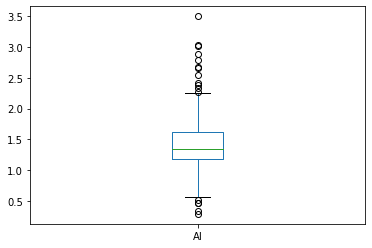

In [18]:
data[col].plot(kind = 'box')
plt.show()

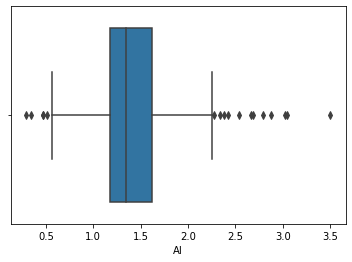

In [19]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


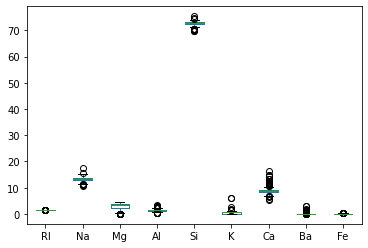

In [20]:
data.plot(kind='box')
plt.show()

# Scaler

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


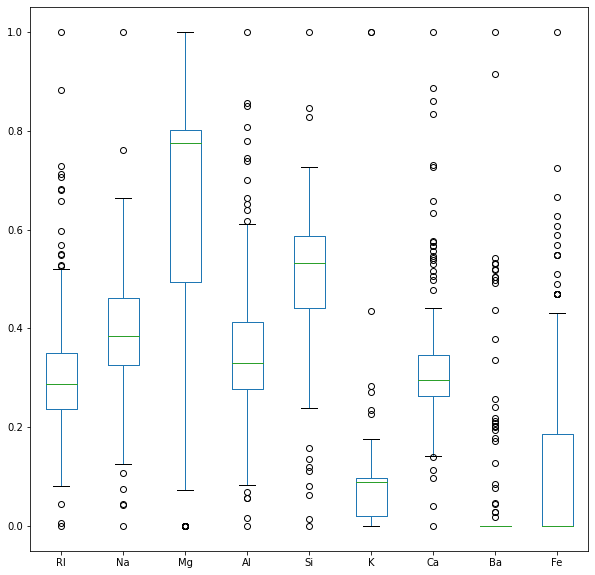

In [21]:
scaler = prepro.MinMaxScaler()
dataScaled = scaler.fit_transform(data[data.columns.values[data.columns.values != 'Class']])

dataScaled = pd.DataFrame(dataScaled, 
                          columns = data.columns.values[data.columns.values != 'Class'])
dataScaled.plot(kind = 'box', figsize = (10, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


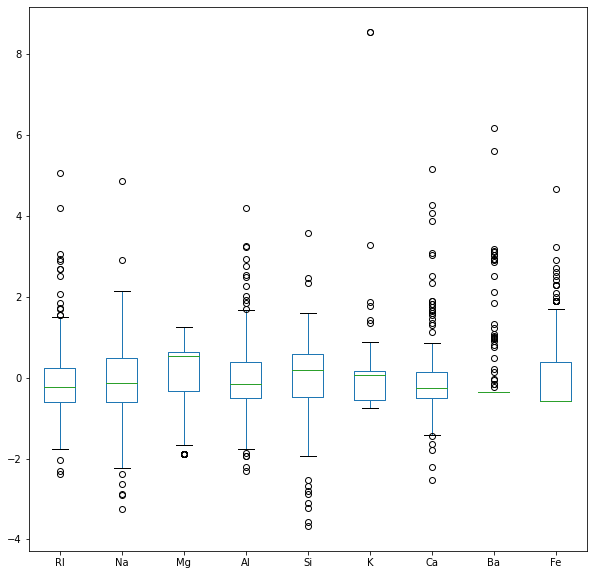

In [22]:
scaler_standart = prepro.StandardScaler()

DataScaled_standart = scaler_standart.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
DataScaled_standart = pd.DataFrame(DataScaled_standart, columns = data.columns.values[data.columns.values != 'Class'])

DataScaled_standart.plot(kind = 'box', figsize = (10, 10))

# Pair plot

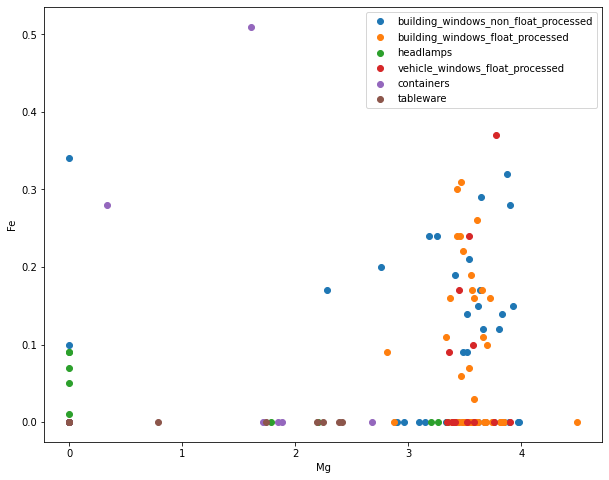

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data['Mg'][data['Class'] == glassType],
             data['Fe'][data['Class'] == glassType],
             label = glassType)

# ax.scatter(data['Mg'], data['Fe'])
ax.set_xlabel('Mg')
ax.set_ylabel('Fe')
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


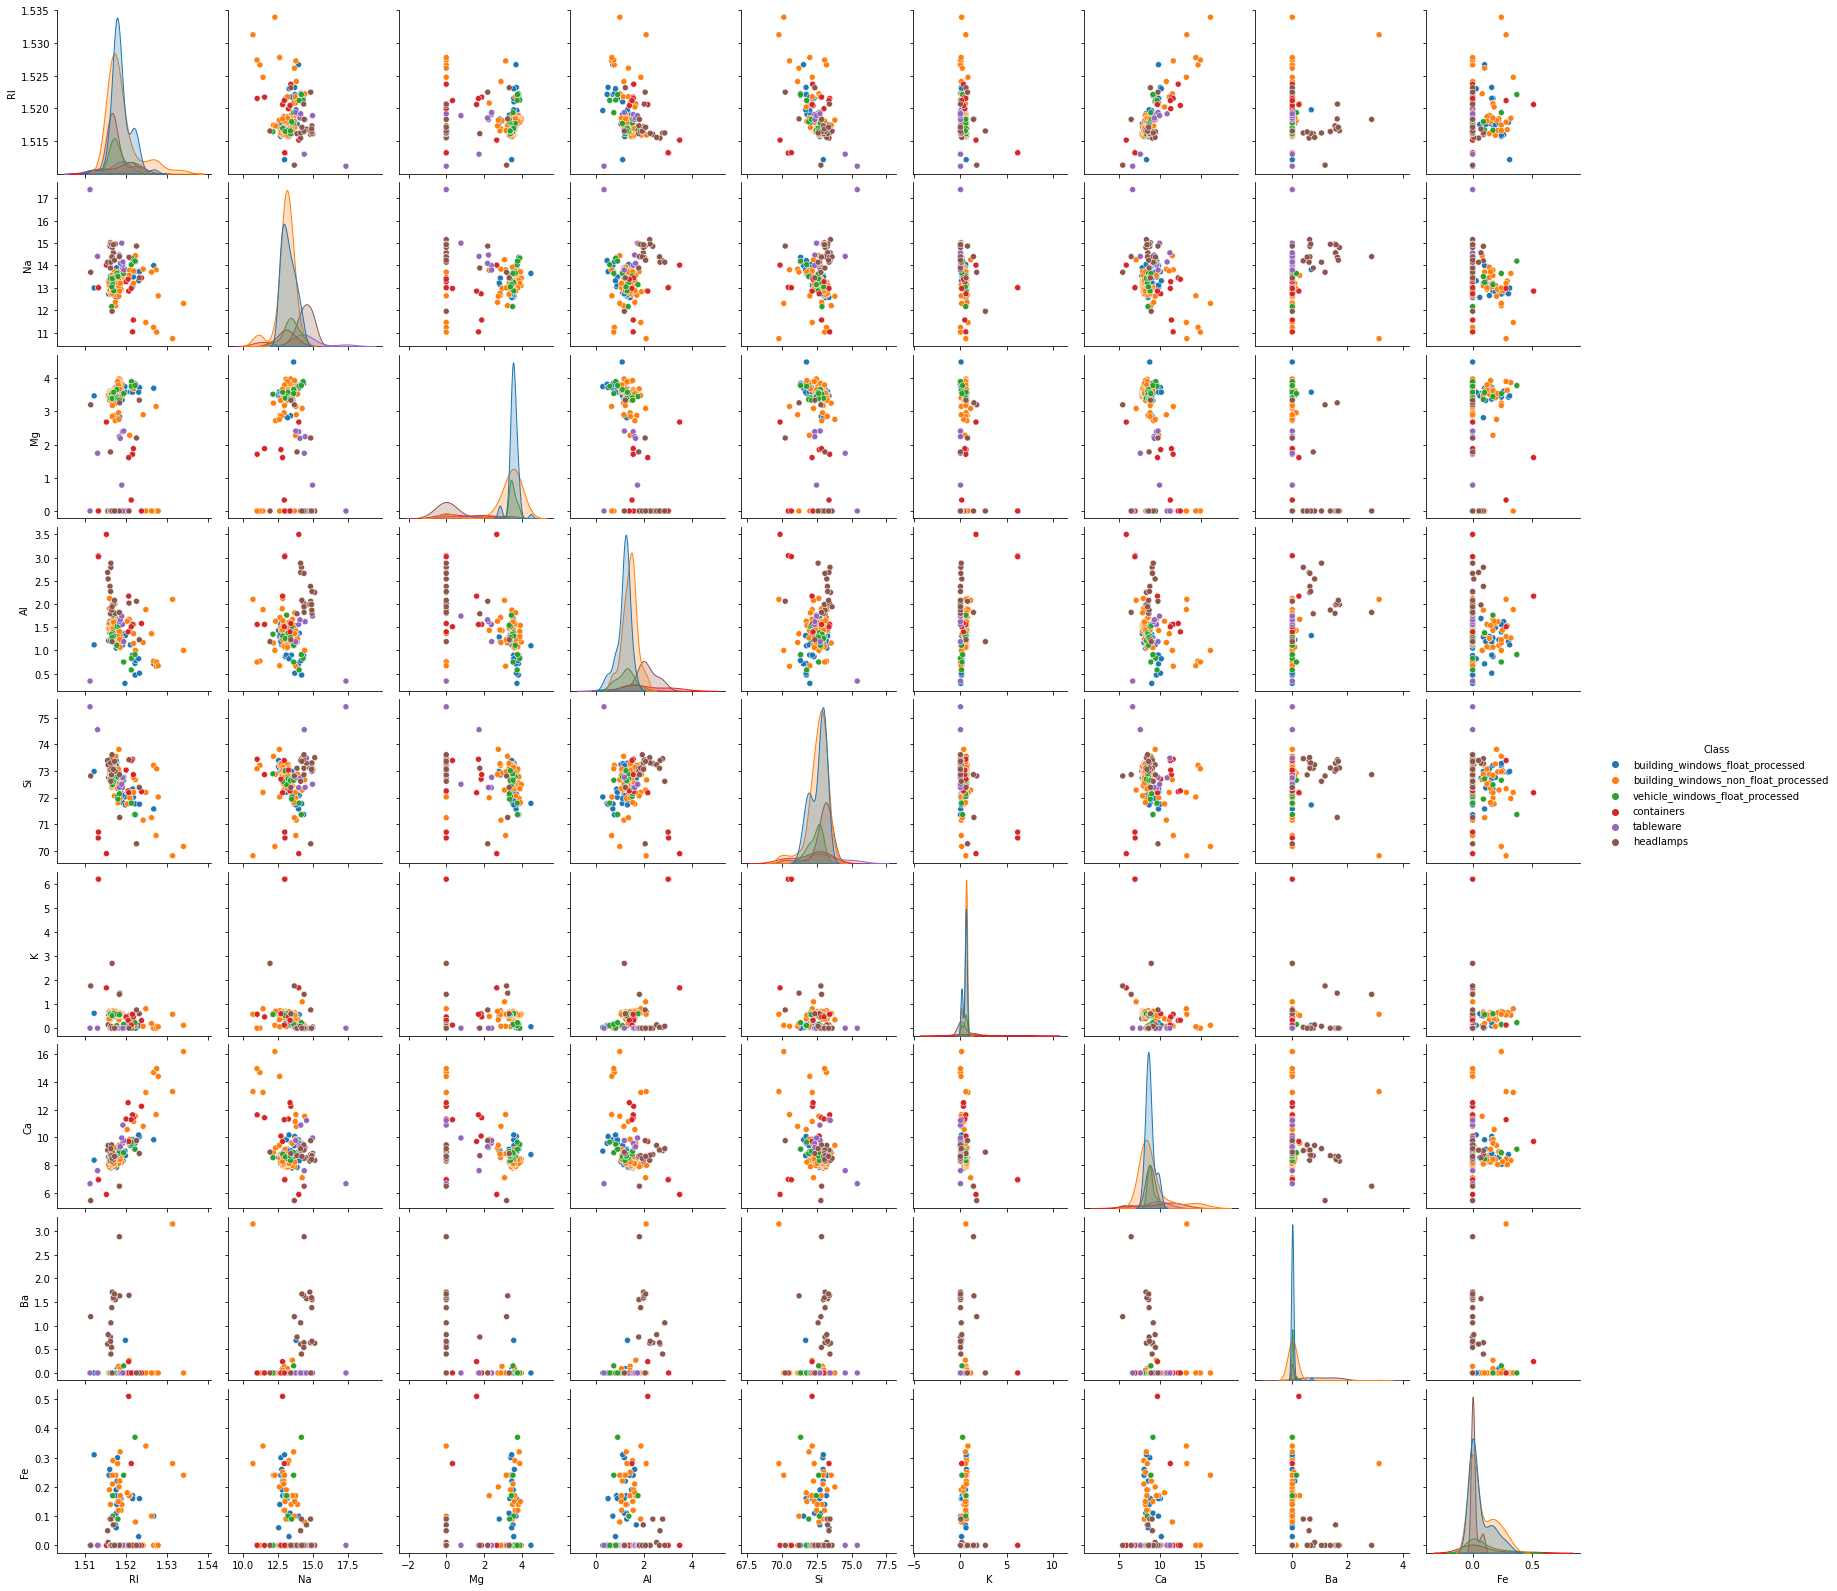

In [24]:
sns.pairplot(data = data, hue='Class')
plt.show()

# NaN

In [25]:
data_fiiled_nan = data.fillna(data.mean()).copy()
data_fiiled_nan['Class'].fillna(data['Class'].value_counts().index.values[0], inplace=True)

In [26]:
data_fillna_mean = data.fillna(data.mean()).copy()
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)
data['RI']=data.groupby(['Class'])['RI'].apply(lambda x:x.fillna(x.mean()))
data['Na']=data.groupby(['Class'])['Na'].apply(lambda x:x.fillna(x.mean()))
data['Mg']=data.groupby(['Class'])['Mg'].apply(lambda x:x.fillna(x.mean()))
data['Al']=data.groupby(['Class'])['Al'].apply(lambda x:x.fillna(x.mean()))
data['Si']=data.groupby(['Class'])['Si'].apply(lambda x:x.fillna(x.mean()))
data['K']=data.groupby(['Class'])['K'].apply(lambda x:x.fillna(x.mean()))
data['Ca']=data.groupby(['Class'])['Ca'].apply(lambda x:x.fillna(x.mean()))
data['Ba']=data.groupby(['Class'])['Ba'].apply(lambda x:x.fillna(x.mean()))
data['Fe']=data.groupby(['Class'])['Fe'].apply(lambda x:x.fillna(x.mean()))


In [27]:
print(data)

           RI     Na    Mg  ...        Ba   Fe                             Class
0    1.518647  13.64  4.49  ...  0.000000  0.0  building_windows_float_processed
1    1.517610  13.89  3.60  ...  0.000000  0.0  building_windows_float_processed
2    1.516180  13.53  3.55  ...  0.000000  0.0  building_windows_float_processed
3    1.517660  13.21  3.69  ...  0.000000  0.0  building_windows_float_processed
4         NaN    NaN   NaN  ...       NaN  NaN                               NaN
..        ...    ...   ...  ...       ...  ...                               ...
209  1.516230  14.14  0.00  ...  1.060000  0.0                         headlamps
210  1.516850  14.92  0.00  ...  1.590000  0.0                         headlamps
211  1.520650  14.36  0.00  ...  1.640000  0.0                         headlamps
212  1.516510  14.38  0.00  ...  1.048333  0.0                         headlamps
213  1.517110  14.23  0.00  ...  1.670000  0.0                         headlamps

[214 rows x 10 columns]


# PCA

In [28]:
pca = PCA()
pca.fit(data_fiiled_nan[data_fiiled_nan.columns[data_fiiled_nan.columns.values != 'Class']])

pca.explained_variance_ratio_*100

array([4.37654579e+01, 2.87863074e+01, 1.11011917e+01, 1.02259951e+01,
       3.30967545e+00, 1.75386222e+00, 9.18578889e-01, 1.38906761e-01,
       2.45883269e-05])

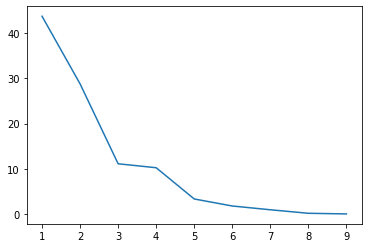

In [29]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10) ,pca.explained_variance_ratio_*100)

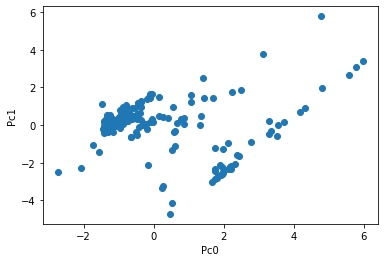

In [30]:
result = pca.transform(data_fiiled_nan[data_fiiled_nan.columns.values[data_fiiled_nan.columns.values != 'Class']])

pca_Names = []

for i in range(9):
  pca_Names.append('Pc' + str(i))

data_pca = pd.DataFrame(result,columns=pca_Names) 
fig, ax = plt.subplots()

ax.scatter(data_pca['Pc0'], data_pca['Pc1'])
ax.set_xlabel('Pc0')
ax.set_ylabel('Pc1')

plt.show()

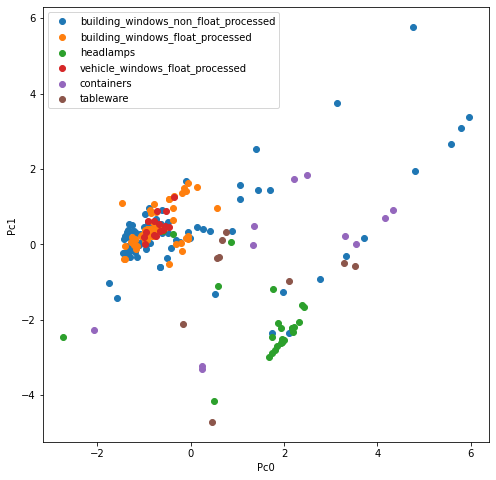

In [31]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'Pc0'
col2 = 'Pc1'

fig, ax = plt.subplots(figsize=(8, 8))

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             label = glassType)
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.legend()


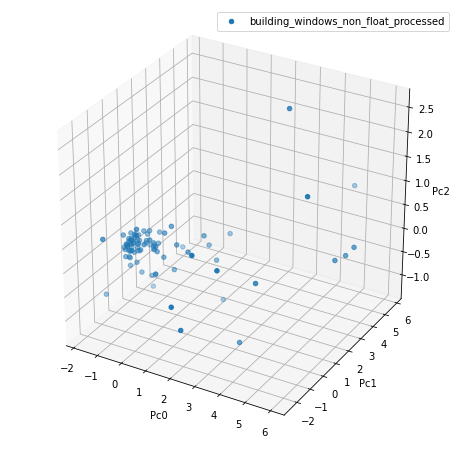

In [32]:
col1 = 'Pc0'
col2 = 'Pc1'
col3 = 'Pc2'

# fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             data_pca[col3][data_pca['Class'] == glassType],
             label = glassType)
  
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)

  ax.legend()

  plt.show()

  # plotly


# Корреляция

In [33]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.182787,-0.030469,-0.375711,-0.535458,-0.296624,0.786561,0.033404,0.142403
Na,-0.182787,1.000000,-0.260921,0.114303,-0.015543,-0.236682,-0.303973,0.258995,-0.244383
Mg,-0.030469,-0.260921,1.000000,-0.482927,-0.208082,-0.030292,-0.329145,-0.447270,0.116730
Al,-0.375711,0.114303,-0.482927,1.000000,0.010620,0.358797,-0.248078,0.387430,-0.038452
Si,-0.535458,-0.015543,-0.208082,0.010620,1.000000,-0.255325,-0.200731,-0.070061,-0.098574
K,-0.296624,-0.236682,-0.030292,0.358797,-0.255325,1.000000,-0.308235,-0.037236,-0.000776
Ca,0.786561,-0.303973,-0.329145,-0.248078,-0.200731,-0.308235,1.000000,-0.039930,0.119631
Ba,0.033404,0.258995,-0.447270,0.387430,-0.070061,-0.037236,-0.039930,1.000000,-0.047852
Fe,0.142403,-0.244383,0.116730,-0.038452,-0.098574,-0.000776,0.119631,-0.047852,1.000000


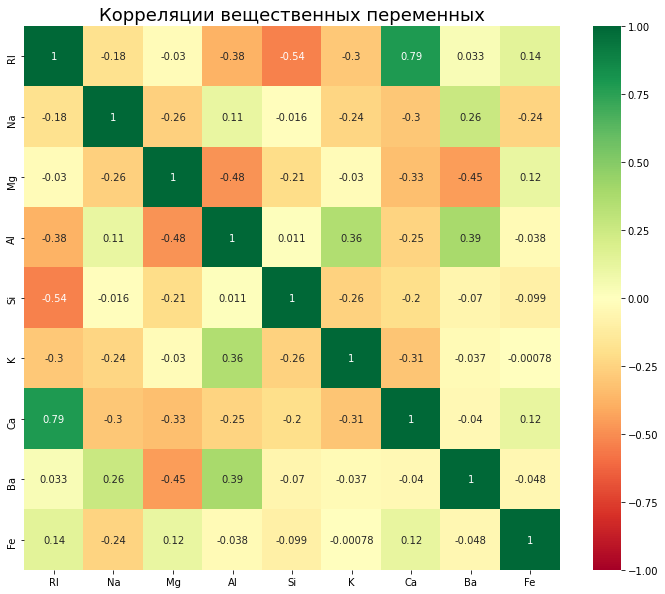

In [34]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin = -1, cmap='RdYlGn')
ax.set_title('Корреляции вещественных переменных', fontsize = 18)

plt.show()

Сильные корреляции (-1; -0,75), (0,75; 1)

Средние корреляции (-0,75; -0,45), (0,45; 0,75)

Слабые корреляции (-0,45; -0,25), (0,25; 0,45)

##Сильная корреляция

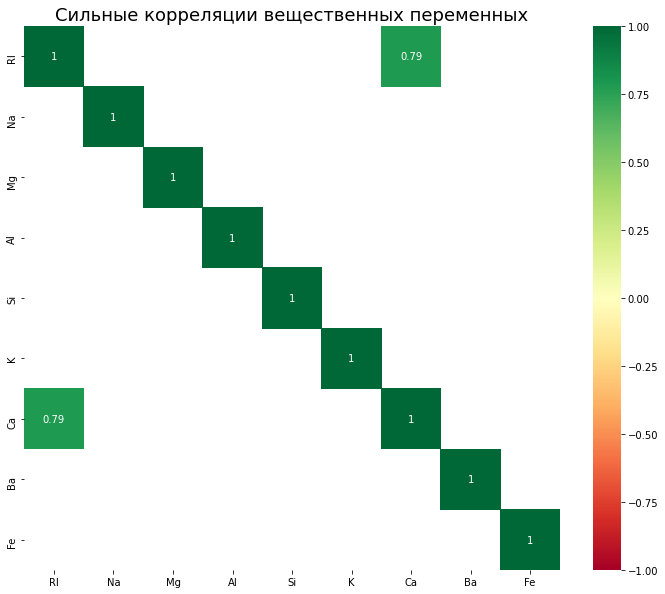

In [35]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr >= 0.69) | (corr <= -0.69)], annot=True, vmax=1, vmin = -1, cmap='RdYlGn')
ax.set_title('Сильные корреляции вещественных переменных', fontsize = 18)

plt.show()

##Средние корреляции

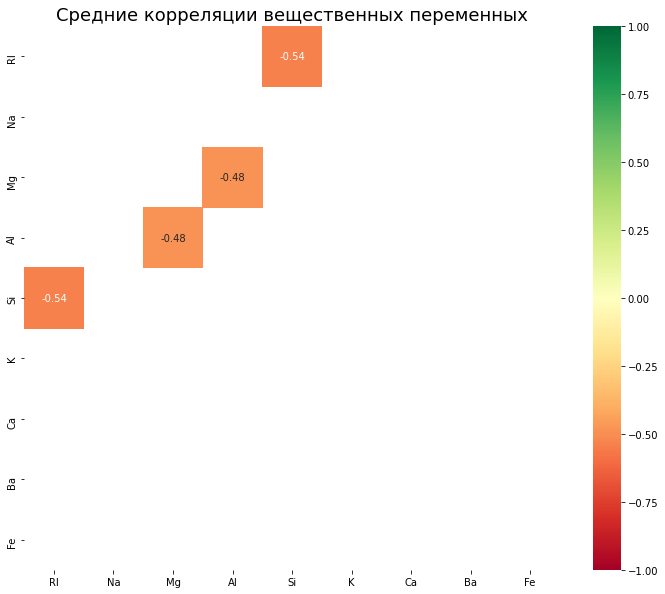

In [36]:
# corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.45 < corr[corr < 0.69]) | (corr[corr > -0.69] < -0.45)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize = 18)

plt.show()

## Слабые корреляции

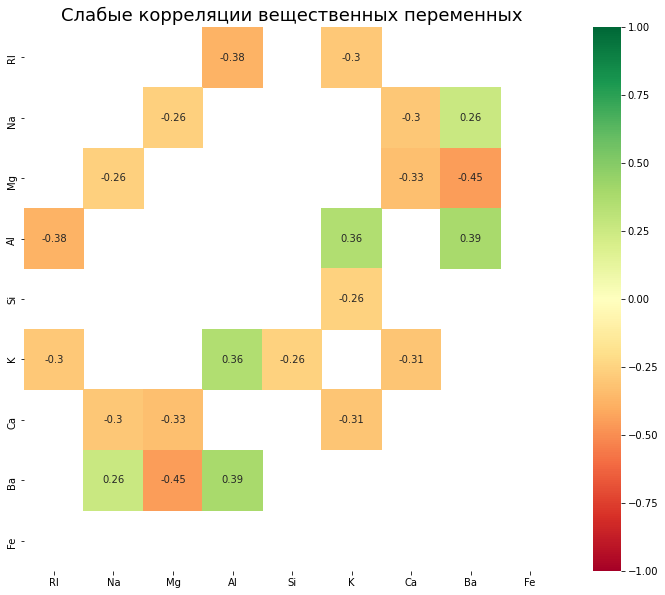

In [37]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.25 < corr[corr < 0.45]) | (corr[corr > -0.45] < -0.25)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize = 18)

plt.show()

# Feature importance

In [38]:
forest = ExtraTreesClassifier(n_estimators=100)
forest.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']], data_fillna_mean['Class'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
forest.feature_importances_
np.sort(forest.feature_importances_)[::-1]

array([0.18178778, 0.12692788, 0.12444321, 0.12413822, 0.10592495,
       0.10241963, 0.09201718, 0.07378247, 0.06855867])

In [40]:
indices = np.argsort(forest.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(9):
  print('%d. features %s (%f)' % (f + 1, data_fillna_mean.columns.values[indices[f]],forest.feature_importances_[indices[f]]))

Feature ranking:
1. features Mg (0.181788)
2. features Al (0.126928)
3. features Ca (0.124443)
4. features RI (0.124138)
5. features Na (0.105925)
6. features K (0.102420)
7. features Si (0.092017)
8. features Ba (0.073782)
9. features Fe (0.068559)


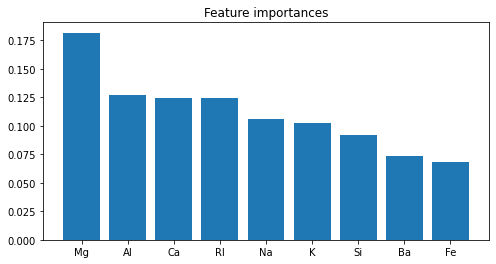

In [41]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices])
plt.show()

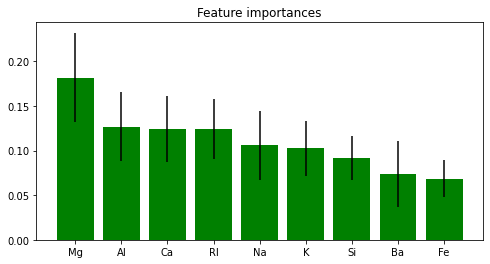

In [42]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)

fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices],
       color='g', yerr=std[indices], align='center')
plt.show()

# Homework

# Задание 2 Формы и виджеты при разработке GUI в Jupyter Notebook


## Форма выбора и представления датафрема

In [43]:
data1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
data2 = pd.read_csv("/content/sample_data/california_housing_train.csv")
data3 = pd.read_csv("/content/sample_data/mnist_test.csv")

format = False #@param {type: "boolean"}

tabl = "data1" #@param ["data1", "data2", "data3"]

if tabl== "data1":
  if format == False:
    print(data1)
  else: data1

if tabl== "data2":
  if format == False:
    print(data2)
  else: data2

if tabl== "data3":
  if format == False:
    print(data3)
  else: data3

data.describe()

      longitude  latitude  ...  median_income  median_house_value
0       -122.05     37.37  ...         6.6085            344700.0
1       -118.30     34.26  ...         3.5990            176500.0
2       -117.81     33.78  ...         5.7934            270500.0
3       -118.36     33.82  ...         6.1359            330000.0
4       -119.67     36.33  ...         2.9375             81700.0
...         ...       ...  ...            ...                 ...
2995    -119.86     34.42  ...         1.1790            225000.0
2996    -118.14     34.06  ...         3.3906            237200.0
2997    -119.70     36.30  ...         2.2895             62000.0
2998    -117.12     34.10  ...         3.2708            162500.0
2999    -119.63     34.42  ...         8.5608            500001.0

[3000 rows x 9 columns]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,1.518428,13.397117,2.775901,1.442468,72.620203,0.514916,8.963345,0.165494,0.059093
std,0.003050,0.792207,1.371026,0.484961,0.721955,0.675784,1.385575,0.478405,0.095808
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.970000,2.720000,1.190000,72.330000,0.150000,8.280000,0.000000,0.000000
50%,1.517750,13.267143,3.470000,1.360000,72.750000,0.540000,8.650000,0.000000,0.000000
75%,1.519056,13.800000,3.590000,1.610000,73.060000,0.610000,9.130000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


## Виджет button для вывода информации или описательной статистики датафрейма

In [47]:
import pandas as pd
import numpy as np
import ipywidgets as wd
from IPython.display import display as dp

data = pd.read_csv("/content/sample_data/california_housing_test.csv")

button = wd.Button(description="Info")
output = wd.Output()

def  on_my_button_click(b):
    with output:
        print('Информация:')
        print(data.info())
        print('\n')
button.on_click(on_my_button_click)
display(button, output)

button = wd.Button(description="Describe")
output = wd.Output()

def  on_my_button_click(b):
    with output:
        print('Описание:')
        print(data.describe())
        print('\n')
button.on_click(on_my_button_click)
display(button, output)

Button(description='Info', style=ButtonStyle())

Output()

Button(description='Describe', style=ButtonStyle())

Output()

# Задание 3 Визуальный анализ данных

## 1. Cделать виджет для выбора переменной. Для выбранной переменной строиться гистограмма, если переменная числовая или столбчатая диаграмма, если переменная категориальная.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

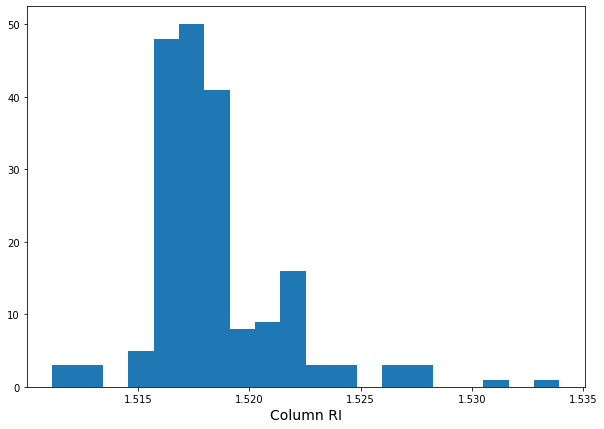

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

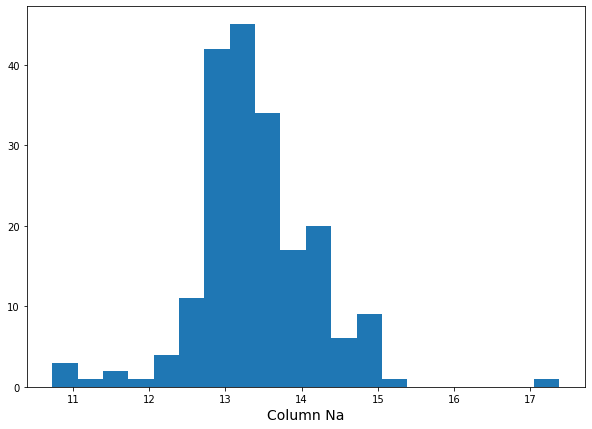

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

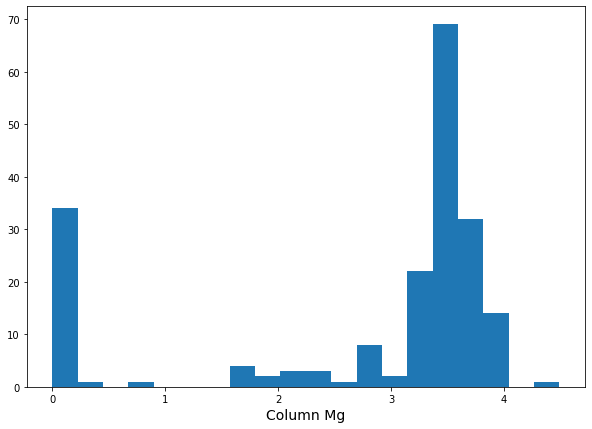

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

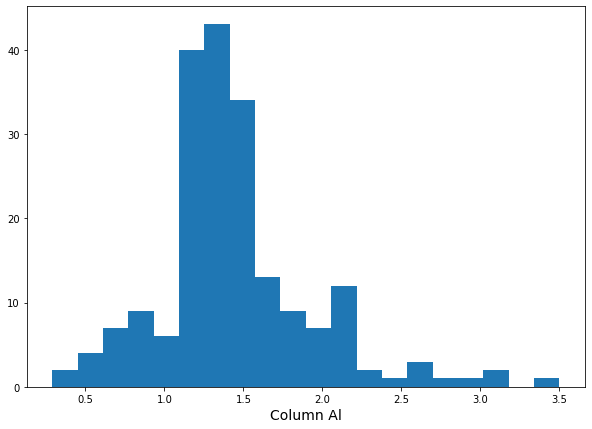

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

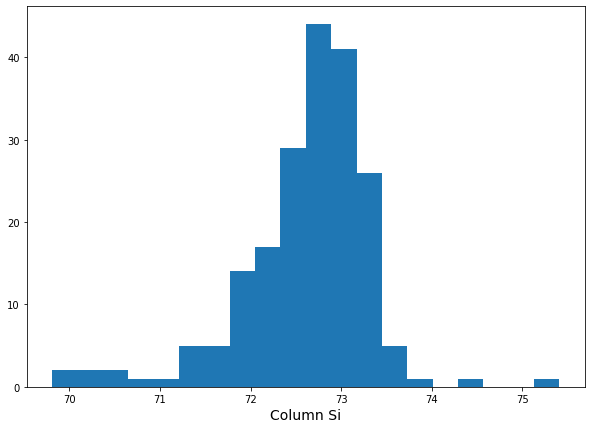

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

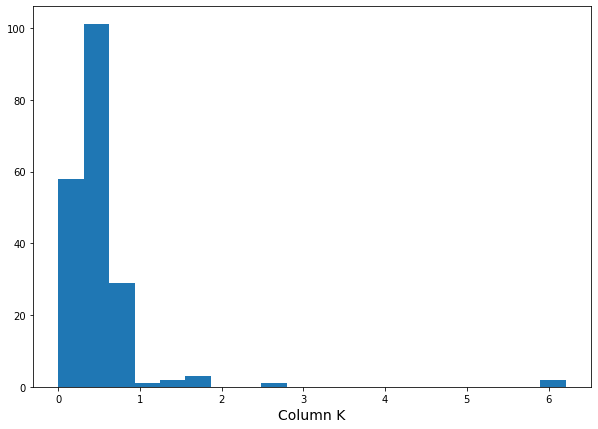

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

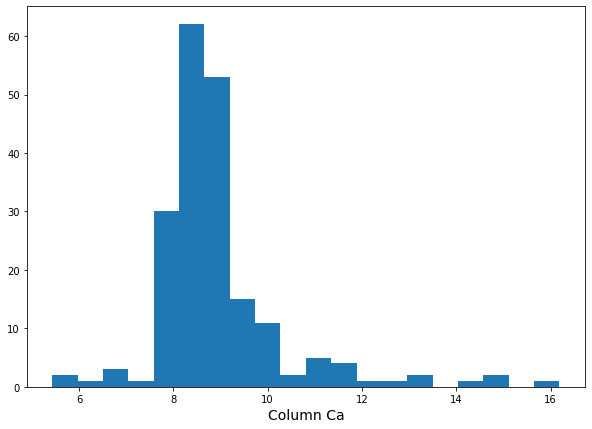

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

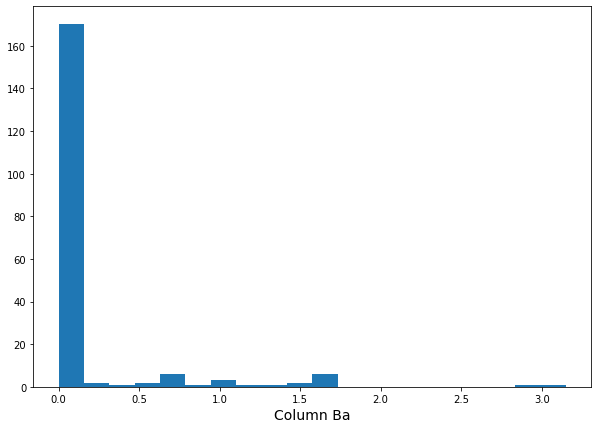

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

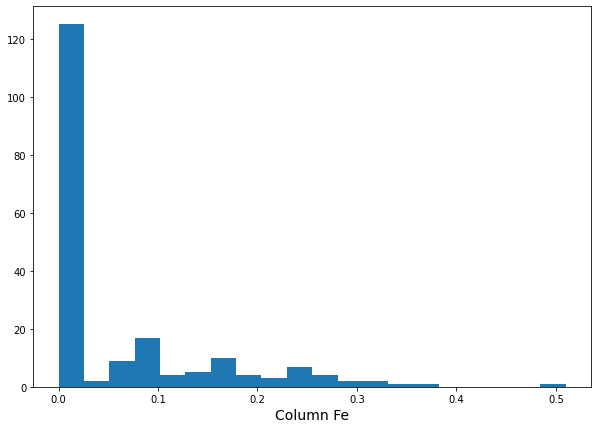

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

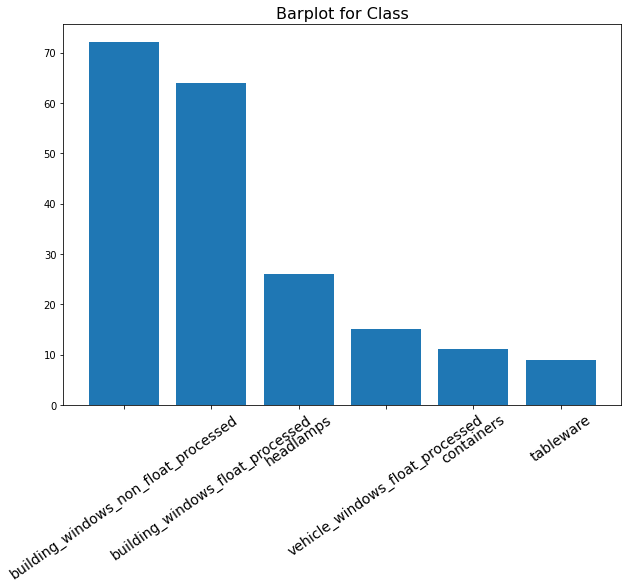

<IPython.core.display.Javascript object>

In [44]:
#@title
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

tb = widgets.TabBar(columns, location='top')

def create_tub(ColName):
  with tb.output_to(str(ColName)):
    fig2, ax2 = plt.subplots(figsize=(10,7))
    if  ColName != 'Class':
      ax2.hist(data[ColName], bins=20)
      ax2.set_xlabel('Column ' + str(ColName), fontsize = 14)
    else:
      ax2.bar(data[ColName].value_counts().index.values, data[ColName].value_counts().values)
      ax2.set_xlabel(None, fontsize = 16 )
      ax2.set_title('Barplot for '+str(ColName), fontsize=16)
      ax2.tick_params(axis='x', which='major', labelsize=14, rotation=35)

    
for n in columns:
  create_tub(n)

## 2.   Cделать виджет для выбора переменной. Для выбранной переменной строиться диаграмма "ящик с усами".

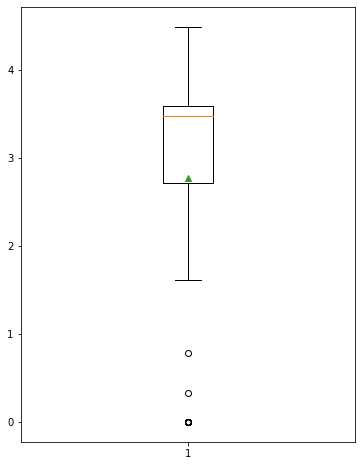

In [45]:
#@title {run: "auto"}
Column_Name = "Mg" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

fig3, ax3 = plt.subplots(figsize = (6, 8))

ax3.boxplot(data[str(Column_Name)][~np.isnan(data[str(Column_Name)])], showmeans=True)

plt.show()


## 3. Сделать виджет для выбора пары переменных, для них строится парный график с раскраской точек по классам.

In [46]:
#@title {run: "auto"}
Variable1 = "K" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
Variable2 = "Al" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

pairButton = widg.Button(description="Show Pair Plot")
pairOutput = widg.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with pairOutput:
    fig, ax = plt.subplots(figsize = (10, 8))

    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[Variable1][data['Class'] == glassType],
                data[Variable2][data['Class'] == glassType],
                label = glassType)

    # ax.scatter(data['Mg'], data['Fe'])
    ax.set_xlabel(Variable1)
    ax.set_ylabel(Variable2)
    ax.legend()

    plt.show()

pairButton.on_click(on_button_clicked)
display(pairButton, pairOutput)


Button(description='Show Pair Plot', style=ButtonStyle())

Output()